<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#로지스틱-회귀분석-과제" data-toc-modified-id="로지스틱-회귀분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>로지스틱 회귀분석 과제</a></span></li></ul></div>

# 로지스틱 회귀분석 과제 

- 1) 타이타닉 데이터를 불러오고 survived를 종속변수(y)로, 나머지 변수들은 독립변수(X)로 설정하세요 


In [1]:
import pandas as pd 
df_t = pd.read_csv("data/titanic.csv")

- 2) X의 결측치가 존재하는 행을 삭제하고, 범주형 변수를 더미변수화 시키세요 

In [2]:
# 결측치가 존재하는 행 확인 > 179 행
df_t[df_t['survived'].isnull() | df_t['pclass'].isnull() | df_t['sex'].isnull() | df_t['age'].isnull() | df_t['sibsp'].isnull() |
     df_t['parch'].isnull() | df_t['fare'].isnull() | df_t['embarked'].isnull() | df_t['class'].isnull() | df_t['adult_male'].isnull() |
     df_t['embark_town'].isnull()
    ]
# 결측치가 존재하는 행 삭제
df_t.dropna(inplace = True)

# 의미가 중복된 열(컬럼) 삭제
df_t.drop(columns = ['pclass', 'embarked'], inplace = True)

# 범주형 변수 더미변수화
df_t = pd.get_dummies(data = df_t, columns = ['sex', 'class', 'embark_town'] , drop_first = True) # drop_first = True 첫번째 카테고리는 사용 X

# 인덱스 리셋
df_t.reset_index(drop = True, inplace = True)

# import statsmodels.api as sm 내 Logit()
# df_t = df_t.astype(float)

In [3]:
df_t.info()
y = df_t['survived']
X = df_t.drop(['survived'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 712 non-null    int64  
 1   age                      712 non-null    float64
 2   sibsp                    712 non-null    int64  
 3   parch                    712 non-null    int64  
 4   fare                     712 non-null    float64
 5   adult_male               712 non-null    bool   
 6   sex_male                 712 non-null    uint8  
 7   class_Second             712 non-null    uint8  
 8   class_Third              712 non-null    uint8  
 9   embark_town_Queenstown   712 non-null    uint8  
 10  embark_town_Southampton  712 non-null    uint8  
dtypes: bool(1), float64(2), int64(3), uint8(5)
memory usage: 32.1 KB


In [4]:
y

0      0
1      1
2      1
3      1
4      0
      ..
707    0
708    0
709    1
710    1
711    0
Name: survived, Length: 712, dtype: int64

In [5]:
X

,age,sibsp,parch,fare,adult_male,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,22.0,1,0,7.2500,True,1,0,1,0,1
1,38.0,1,0,71.2833,False,0,0,0,0,0
2,26.0,0,0,7.9250,False,0,0,1,0,1
3,35.0,1,0,53.1000,False,0,0,0,0,1
4,35.0,0,0,8.0500,True,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
707,39.0,0,5,29.1250,False,0,0,1,1,0
708,27.0,0,0,13.0000,True,1,1,0,0,1
709,19.0,0,0,30.0000,False,0,0,0,0,1
710,26.0,0,0,30.0000,True,1,0,0,0,0


- 3) 독립변수(X)를 StandardScaler를 통해 변환하세요 

In [6]:
# 스케일링 - 표준화(Standardzation) : 각 컬럼을 평균 0, 분산 1인 정규분포로 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = X.columns + "_scaled")
X

,age_scaled,sibsp_scaled,parch_scaled,fare_scaled,adult_male_scaled,sex_male_scaled,class_Second_scaled,class_Third_scaled,embark_town_Queenstown_scaled,embark_town_Southampton_scaled
0,-0.527669,0.522511,-0.506787,-0.516380,0.850865,0.756138,-0.566538,1.002813,-0.202326,0.534040
1,0.577094,0.522511,-0.506787,0.694046,-1.175275,-1.322511,-0.566538,-0.997195,-0.202326,-1.872519
2,-0.251478,-0.552714,-0.506787,-0.503620,-1.175275,-1.322511,-0.566538,1.002813,-0.202326,0.534040
3,0.369951,0.522511,-0.506787,0.350326,-1.175275,-1.322511,-0.566538,-0.997195,-0.202326,0.534040
4,0.369951,-0.552714,-0.506787,-0.501257,0.850865,0.756138,-0.566538,1.002813,-0.202326,0.534040
...,...,...,...,...,...,...,...,...,...,...
707,0.646142,-0.552714,5.350885,-0.102875,-1.175275,-1.322511,-0.566538,1.002813,4.942527,-1.872519
708,-0.182430,-0.552714,-0.506787,-0.407687,0.850865,0.756138,1.765108,-0.997195,-0.202326,0.534040
709,-0.734812,-0.552714,-0.506787,-0.086335,-1.175275,-1.322511,-0.566538,-0.997195,-0.202326,0.534040
710,-0.251478,-0.552714,-0.506787,-0.086335,0.850865,0.756138,-0.566538,-0.997195,-0.202326,-1.872519


- 4) X와 y를 홀드아웃 기법을 사용하여 7:3으로 분할하세요 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 1000)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(498, 10) (214, 10) (498,) (214,)


- 5) X_train과 y_train을 가지고 로지스틱 회귀분석모델을 만드세요

In [8]:
# 로지스틱회귀모형 모델링
import statsmodels.api as sm
model = sm.Logit(y_train, X_train) # 순서주의
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.422384
         Iterations 7


In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      488
Method:                           MLE   Df Model:                            9
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                  0.3737
Time:                        17:16:28   Log-Likelihood:                -210.35
converged:                       True   LL-Null:                       -335.88
Covariance Type:            nonrobust   LLR p-value:                 5.965e-49
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
age_scaled                        -0.4114      0.160     -2.575      0.010      -0.725      -0.098
sibsp_scaled                      -0.6798      0.159     -4.282      0.000      -0.991      -0.369
parch_scaled                      -0.3687      0.138     -2.678      0.007      -0.639      -0.099
fare_scaled                        0.4112      0.259      1.590      0.112      -0.096       0.918
adult_male_scaled                 -1.7152      0.365     -4.698      0.000      -2.431      -1.000
sex_male_scaled                    0.0085      0.328      0.026      0.979      -0.634       0.651
class_Second_scaled               -0.3666      0.187     -1.956      0.050      -0.734       0.001
class_Third_scaled                -0.8364      0.224     -3.733      0.000      -1.276      -0.397
embark_town_Queenstown_scaled     -0.1435      0.139     -1.036      0.300      -0.415       0.128
embark_town_Southampton_scaled    -0.1719      0.154     -1.115      0.265      -0.474       0.130
==================================================================================================
"""

In [10]:
result.aic

440.6942497710129

- 6) 변수선택법을 통해 최적의 회귀 방정식을 구하고, 유의한 변수만을 추출하세요. (변수선택법은 복사 붙여넣기) 

In [11]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법 
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y,predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors]
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [12]:
Stepwise_best_model = Stepwise_model(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.690466
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688619
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688805
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.629165
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522791
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.520969
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687310
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622893
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.690157
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.678031
  

         Current function value: 0.444645
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.443350
         Iterations 7
Processed  6 models on 5 predictors in
Selected predictors: ['class_Third_scaled', 'adult_male_scaled', 'sibsp_scaled', 'fare_scaled', 'parch_scaled']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x00000257041BC220>
forward
Optimization terminated successfully.
         Current function value: 0.444885
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450281
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.458533
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.616403
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.443014
         Iterations 7
Processed  5 models on 4 predictors in 0.030997037887573242
Selected pr

In [13]:
print(Stepwise_best_model.aic)
print(Stepwise_best_model.params)
Stepwise_best_model.summary()

436.2783235421726
class_Third_scaled    -0.880756
adult_male_scaled     -1.698549
sibsp_scaled          -0.700885
fare_scaled            0.460331
parch_scaled          -0.365068
age_scaled            -0.425035
class_Second_scaled   -0.406580
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                            6
Date:                Mon, 31 Oct 2022   Pseudo R-squ.:                  0.3714
Time:                        17:16:37   Log-Likelihood:                -211.14
converged:                       True   LL-Null:                       -335.88
Covariance Type:            nonrobust   LLR p-value:                 5.313e-51
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
class_Third_scaled     -0.8808      0.222     -3.969      0.000      -1.316      -0.446
adult_male_scaled      -1.6985      0.157    -10.838      0.000      -2.006      -1.391
sibsp_scaled           -0.7009      0.143     -4.890      0.000      -0.982      -0.420
fare_scaled             0.4603      0.260      1.772      0.076      -0.049       0.969
parch_scaled           -0.3651      0.136     -2.680      0.007      -0.632      -0.098
age_scaled             -0.4250      0.154     -2.753      0.006      -0.728      -0.122
class_Second_scaled    -0.4066      0.183     -2.220      0.026      -0.766      -0.048
=======================================================================================
"""

- 6) X_test값을 가지고 y_predict값을 구한 후 혼동행렬을 만드세요 

In [14]:
# X_train과 X_test의 차원 동일 필요
X_test = X_test[Stepwise_best_model.params.index]
y_pred = Stepwise_best_model.predict(X_test)
y_pred

568    0.994006
596    0.900238
419    0.065810
106    0.334668
617    0.195068
         ...   
277    0.937450
634    0.145031
507    0.390022
69     0.186154
373    0.667204
Length: 214, dtype: float64

In [15]:
# 임계값을 설정해서 예측값을 이진분류로 반환하기

def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold] = 0
    return (Y.astype(int))

y_pred = cut_off(y_pred, 0.5) #임계값을 0.5로 설정
y_pred

568    1
596    1
419    0
106    0
617    0
      ..
277    1
634    0
507    0
69     0
373    1
Length: 214, dtype: int32

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[107,  20],
       [ 24,  63]], dtype=int64)

In [17]:
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.794392523364486
0.7241379310344828
0.7590361445783133
0.7411764705882353


- 7) X_test값을 가지고 y_predict_proba 값을 구한 후 roc_auc_score를 구하고 해석하세요 

In [18]:
y_predict_proba = Stepwise_best_model.predict(X_test)
y_predict_proba

568    0.994006
596    0.900238
419    0.065810
106    0.334668
617    0.195068
         ...   
277    0.937450
634    0.145031
507    0.390022
69     0.186154
373    0.667204
Length: 214, dtype: float64

In [19]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_predict_proba))

0.849262376685673


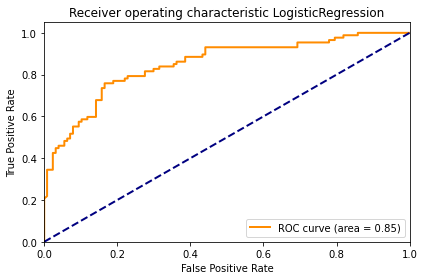

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# ROC 커브 시각화

def draw_roc(y_test, y_predict_proba, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_predict_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(model_name))
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()
draw_roc(y_test, y_predict_proba, "LogisticRegression")

- 7) 회귀계수를 구하고, 유의한 회귀계수의 값을 설명하세요 

In [21]:
import numpy as np
np.exp(Stepwise_best_model.params)    

class_Third_scaled     0.414470
adult_male_scaled      0.182949
sibsp_scaled           0.496146
fare_scaled            1.584598
parch_scaled           0.694149
age_scaled             0.653747
class_Second_scaled    0.665924
dtype: float64

##### class_third인 경우 생존확률이 59% 감소
##### adult_male인 경우 생존확률이 82% 감소
##### sibsp이 한 단위 증가할 때 생존확률이 51% 감소
##### fare가 한 단위 증가할 때 생존확률이 58% 증가
##### parch가 한 단위 증가할 때 생존확률이 31% 감소
##### age가 한 단위 증가할 때 생존확률이 35% 감소
##### class_second인 경우 생존확률이 34% 감소